In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [2]:
FILE_PATH = "/kaggle/input/chest-xray-pneumonia/chest_xray"

## Goal: Classify chest X-rays as Pneumonia vs Normal.

### **Importing neccessary libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-09-06 09:33:08.255611: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757151188.483997      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757151188.559455      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Data Preprocessing

#### **Preprocessing the training set**

In [7]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True
)

training_set = train_generator.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/train',
    batch_size=32,
    target_size=(64, 64),
    class_mode="binary"
)

Found 5216 images belonging to 2 classes.


#### **Preprocessing the testing set**

In [9]:
testing_generator = ImageDataGenerator(rescale=1./255)

testing_set = testing_generator.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/test',
    target_size=(64, 64),
    class_mode="binary",
    batch_size=32
)

Found 624 images belonging to 2 classes.


## Building the CNN Model

### **Initializing the CNN model**

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D

cnn = Sequential()

### Adding the first layer

In [36]:
cnn.add(Input(shape=(64, 64, 3)))

In [37]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

#### Applying Pooling

In [38]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding the second layer

In [39]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Flattening the Model

In [40]:
cnn.add(tf.keras.layers.Flatten())

#### Adding the Full Connection

In [41]:
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))

#### Adding the final Output Layer

In [42]:
cnn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

### **Compiling the CNN Model**

In [43]:
cnn.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=['accuracy']
)

cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

### **Training the CNN Model**

In [44]:
history = cnn.fit(
    x = training_set, 
    validation_data = testing_set,
    epochs = 10
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 427ms/step - accuracy: 0.8073 - loss: 0.4144 - val_accuracy: 0.7885 - val_loss: 0.4638
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 420ms/step - accuracy: 0.9318 - loss: 0.1706 - val_accuracy: 0.7949 - val_loss: 0.5631
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 417ms/step - accuracy: 0.9365 - loss: 0.1525 - val_accuracy: 0.7276 - val_loss: 0.8854
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 420ms/step - accuracy: 0.9490 - loss: 0.1391 - val_accuracy: 0.7580 - val_loss: 0.7098
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 417ms/step - accuracy: 0.9497 - loss: 0.1352 - val_accuracy: 0.8093 - val_loss: 0.5345
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 419ms/step - accuracy: 0.9517 - loss: 0.1316 - val_accuracy: 0.7869 - val_loss: 0.6792
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 421ms/step - accuracy: 0.9511 - loss: 0.1404 - val_accuracy: 0.8045 - val_loss: 0.5983
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 420ms/step - accuracy: 0.9584 - loss: 0

### **Model Representation**

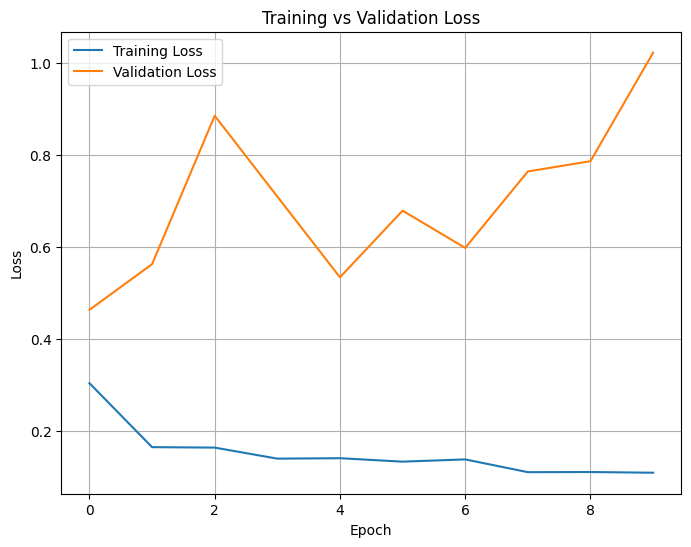

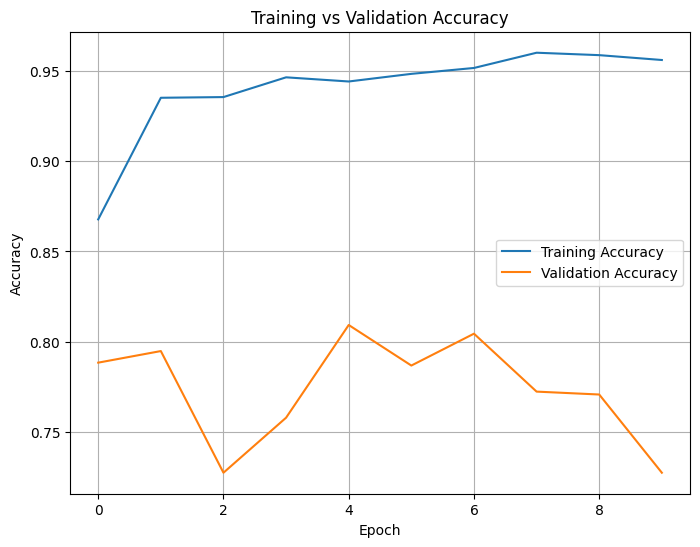

In [45]:
# ---- Plot Training vs Validation Loss ----
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ---- Plot Training vs Validation Accuracy ----
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### **Prediction Phase**

In [51]:
from tensorflow.keras.preprocessing import image

# Load and preprocess image
# img_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg"
img_path="/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg"
img = image.load_img(img_path, target_size=(64, 64))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Prediction
result = cnn.predict(img_array)

# Binary classification with threshold
if result[0][0] >= 0.5:
    prediction = "PNEUMONIA"
else:
    prediction = "NORMAL"

print("Your Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Your Prediction: PNEUMONIA
